# Striatal dopamine dynamics - Fig. 2, Regional differences in uptake impacts dynamics

Written by Aske Lykke Ejdrup<br>
Last updated: 2023/08/21

Code for the model presented in the manuscript:<br>
**Striatal dopamine dynamics and the regulation by the dopamine transporter** (unpublished)<br>
<font size = "2">By Aske L. Ejdrup<sup>1</sup>, Jakob K. Dreyer<sup>2</sup>, Matthew D. Lycas<sup>1</sup>, Søren H. Jørgensen<sup>1</sup>, Trevor W. Robbins<sup>3,4</sup>, Jeffrey W. Dalley<sup>3,4,5</sup>, Freja Herborg<sup>1</sup> and Ulrik Gether<sup>1</sup></font>

<br>


<font size = "2">
<sup>1</sup>Department of Neuroscience, Faculty of Health and Medical Sciences, Maersk Tower 7.5,
University of Copenhagen, Copenhagen, Denmark<br>
<sup>2</sup>Department of Bioinformatics, H Lundbeck A/S, Valby, Denmark<br>
<sup>3</sup>Behavioural and Clinical Neuroscience Institute, University of Cambridge, Cambridge CB2 3EB, UK<br>
<sup>4</sup>Department of Psychology, University of Cambridge, Cambridge CB2 3EB, UK<br>
<sup>5</sup>Department of Psychiatry, University of Cambridge, Cambridge CB2 0SZ, UK<br>
</font>

<font color="grey">Size of simulation space is defined as an input parameter in *sim.sim_space_neurons_3D*. If the code takes too long to run, consider reducing the size.</font>

#### Import functions

In [1]:
import sim_functions as sim
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
from tqdm import tqdm
from matplotlib.gridspec import GridSpec

### Figure 2A, steady state of both regions

#### Simulate pacemaker activity in both regions

In [3]:
## DS
# Simulate release sites and firing pattern
simulation, space_ph, firing, release_sites, var_list = \
        sim.sim_space_neurons_3D(width = 100, depth = 100, dx_dy = 1, time = 2, D = 763,
                  inter_var_distance = 25, p_r = 0.06, f_rate = 4, n_neurons = 150, Hz = 0.005)

# Simulate temporal dopamine dynamics      
full_sim_DS, _, _ = sim.sim_dynamics_3D(simulation, space_ph, release_sites, firing, var_list, 
                  Q = 3000, uptake_rate = 6*10**-6, Ds = 321.7237308146399)

## VS
# Simulate release sites and firing pattern
simulation, space_ph, firing, release_sites, var_list = \
        sim.sim_space_neurons_3D(width = 100, depth = 100, dx_dy = 1, time = 2, D = 763,
                  inter_var_distance = 25*(1/0.9), p_r = 0.06, f_rate = 4, n_neurons = 150, Hz = 0.005)

# Simulate temporal dopamine dynamics     
full_sim_VS, _, _ = sim.sim_dynamics_3D(simulation, space_ph, release_sites, firing, var_list, 
                  Q = 3000, uptake_rate = 2*10**-6, Ds = 321.7237308146399)

KeyboardInterrupt: 

#### Plot steady state images

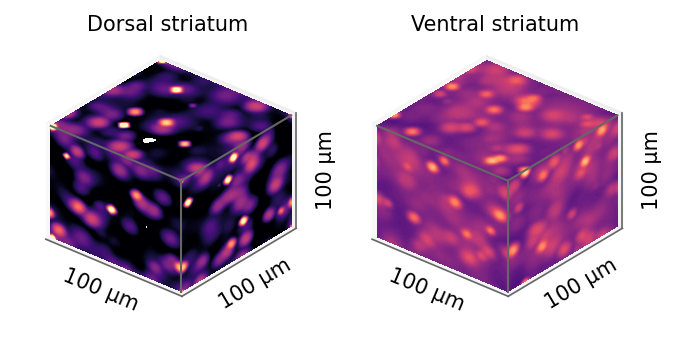

In [8]:
## Plot steady state image of both regions
## (The contours are plotted three times each to avoid transparency)

# Define dimensions
Nx, Ny, Nz = 100, 100, 100
X, Y, Z = np.meshgrid(np.arange(Nx), np.arange(Ny), -np.arange(Nz))

# Create a figure with 3D ax
fig = plt.figure(figsize=(4.5, 2.5), dpi = 150)
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_proj_type('ortho')
fig.text(0.26, 0.90, "Dorsal striatum", fontsize = 10, ha = "center")
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_proj_type('ortho')
fig.text(0.745, 0.90, "Ventral striatum", fontsize = 10, ha = "center")
# fig.text(0.53, 0.88, "Snapshot of steady state [DA]", fontsize = 10, ha = "center")

cmap = "magma"

kw = {
    'vmin': -8.5,
    'vmax': -6.5,
    'levels': np.linspace(-9, -6, 100),
}

# Plot contour surfaces of DS
data = np.log10(full_sim_DS[221,:,:,:])
for i in range(3):
    _ = ax1.contourf(
        X[:, :, 0], Y[:, :, 0], data[:, :, 0],
        zdir='z', offset=0, **kw, cmap = cmap,
    )

    _ = ax1.contourf(
        X[0, :, :], data[0, :, :], Z[0, :, :],
        zdir='y', offset=0, **kw, cmap = cmap,
    )
    C = ax1.contourf(
        data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
        zdir='x', offset=X.max(), **kw, cmap = cmap,
    )
# --


# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax1.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
ax1.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
ax1.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
ax1.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax1.set_zlim(-99,0)
ax1.set_zlabel('100 \u00B5m', labelpad = -12)
ax1.set_zticks([])
ax1.set_xlim(0,99)
ax1.set_xlabel('100 \u00B5m', labelpad = -12)
ax1.set_xticks([])
ax1.set_xlim(0,99)
ax1.set_ylabel('100 \u00B5m', labelpad = -12)
ax1.set_yticks([])

ax1.w_xaxis.line.set_color([0.4,0.4,0.4])
ax1.w_yaxis.line.set_color([0.4,0.4,0.4])
ax1.w_zaxis.line.set_color([0.4,0.4,0.4])

# Set distance and angle view
ax1.view_init(30, -50)
ax1.dist = 11


# Plot contour surfaces of VS
data = np.log10(full_sim_VS[210,:,:,:])
for i in range(3):
    _ = ax2.contourf(
        X[:, :, 0], Y[:, :, 0], data[:, :, 0],
        zdir='z', offset=0, **kw, cmap = cmap,
    )

    _ = ax2.contourf(
        X[0, :, :], data[0, :, :], Z[0, :, :],
        zdir='y', offset=0, **kw, cmap = cmap,
    )
    C = ax2.contourf(
        data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
        zdir='x', offset=X.max(), **kw, cmap = cmap,
    )
# --


# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax2.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
ax2.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
ax2.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
ax2.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax2.set_zlim(-99,0)
ax2.set_zlabel('100 \u00B5m', labelpad = -12)
ax2.set_zticks([])
ax2.set_xlim(0,99)
ax2.set_xlabel('100 \u00B5m', labelpad = -12)
ax2.set_xticks([])
ax2.set_xlim(0,99)
ax2.set_ylabel('100 \u00B5m', labelpad = -12)
ax2.set_yticks([])

ax2.w_xaxis.line.set_color([0.4,0.4,0.4])
ax2.w_yaxis.line.set_color([0.4,0.4,0.4])
ax2.w_zaxis.line.set_color([0.4,0.4,0.4])

# Set distance and angle view
ax2.view_init(30, -50)
ax2.dist = 11

fig.tight_layout()

### Figure 2B, cross section of both regions

#### Plot cross section

(-6.0, -9.0)

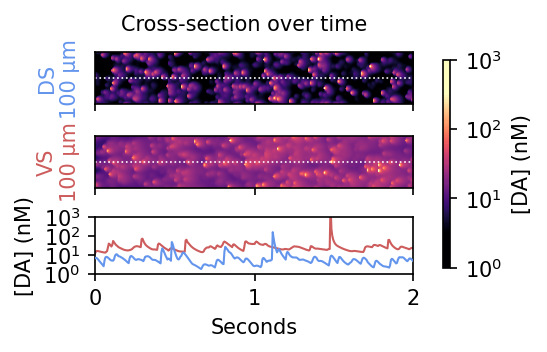

In [11]:
# Define the x-axis values
time_points = []
for i in range(3):
    time_points.append(np.argmin(abs(np.linspace(0,2,len(full_sim_DS)-30)-i)))

fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize = (3,2.5), dpi = 150)
fig.suptitle("Cross-section over time", fontsize = 10, x = 0.56, y = 0.92)


ax1.set_ylabel("DS\n100 \u00B5m", labelpad = 7, color = "cornflowerblue")
ax1.set_yticks([])
ax1.set_xticks(time_points)
ax1.set_xticklabels([])
ax1.set_xlim(time_points[0],time_points[-1])
im = ax1.imshow(np.log10(full_sim_DS[30:,50,:,50].T+10**-10), aspect = 0.6, vmin = -8.5, vmax = -6.5, cmap = "magma")
ax1.plot([0,6104], [50,50], color = "w", ls = ":", lw = 0.8)

ax2.set_ylabel("VS\n100 \u00B5m", labelpad = 7, color = "indianred")
ax2.set_yticks([])
ax2.set_xticks(time_points)
ax2.set_xticklabels([])
ax2.set_xlim(time_points[0],time_points[-1])
ax2.imshow(np.log10(full_sim_VS[30:,51,:,50].T+10**-10), aspect = 0.6, vmin = -8.5, vmax = -6.5, cmap = "magma")
ax2.plot([0,6104], [50,50], color = "w", ls = ":", lw = 0.8)


ax3.plot(np.log10(full_sim_DS[30:,50,50,50]+10**-10), color = "cornflowerblue", lw = 1, zorder = 3)
ax3.plot(np.log10(full_sim_VS[30:,51,49,50]+10**-10), color = "indianred", lw = 1, zorder = 2)

ax3.set_ylim(-9,-6)
ax3.set_ylabel('[DA] (nM)')
ax3.set_yticks([-6, -7, -8, -9])
ax3.set_yticklabels(['$10^{3}$', '$10^{2}$', '$10^{1}$','$10^{0}$'])
ax3.set_xlim(time_points[0],time_points[-1])
ax3.set_xlabel("Seconds")
ax3.set_xticks(time_points)
ax3.set_xticklabels([0,1,2])

fig.tight_layout()

kw = {
    'vmin': -8.5,
    'vmax': -6.5,
    'levels': np.linspace(-9, -6, 100),
}
im = plt.contourf(
    np.log10(full_sim_DS[200,:,:,20]+10**-10),np.log10(full_sim_DS[200,:,:,20]+10**-10),np.log10(full_sim_DS[200,:,:,20]+10**-10),
     **kw, alpha = 1, cmap = "magma"
)
    
cbar_ax = fig.add_axes([1, 0.245, 0.017, 0.555])
cbar = fig.colorbar(im, cax=cbar_ax, ticks = [-6, -7, -8, -9])
cbar_ax.set_ylabel('[DA] (nM)', labelpad=5, rotation = 90)
cbar_ax.set_yticklabels(['$10^{3}$', '$10^{2}$', '$10^{1}$','$10^{0}$'])
cbar_ax.set_ylim( -6, -9 )

### Figure 2E, modelled FSCV response to burst

#### Simulate the burst train

In [4]:
# Set simulation parameters
time = 20
freq = 0.1 # Match sampling rate of conventional FSCV (10 Hz)

# Firing properties
APs = [120, 120, 120]
HZs = [60, 30, 10]

# Preallocate space for simulation results
# Dimensions are = (regions, freqs, time, x, y, z)
sim_burst = np.zeros((2,3,int(time/freq),50,50,50))


# Run through all three bursting scenarios
for i in range(sim_burst.shape[1]):
    
    ## DS
    # # Simulate release sites and firing pattern
    simulation, space_ph, firing, release_sites, var_list = \
            sim.sim_space_neurons_3D(width = 50, depth = 50, dx_dy = 1, time = time, D = 763,
                      inter_var_distance = 25, p_r = 0.06, f_rate = 4, n_neurons = 150, Hz = freq)
            
    # Define the burst
    start_time = 1 # In seconds
    start_time_dt = int(start_time/var_list[1]) # convert to index
    
    n_ap = APs[i] # Number of action potentials in a burst
    burst_rate = HZs[i] # Burst firing rate (Hz)
    burst_p_r = 0.06 # Release probability per AP during bursts
    
    
    burst_time = int(1/var_list[1]*(n_ap/burst_rate)) # Length of the burst
    AP_freq = n_ap/burst_time # APs per d_t
    
    
    # Generate the burst of firing
    firing[start_time_dt:start_time_dt+burst_time,:] =\
        np.random.poisson(AP_freq * burst_p_r, (burst_time, firing.shape[1]))
    
            
    # Simulate the dynamics
    sim_burst[0,i,:,:,:,:], _, _ = sim.sim_dynamics_3D(simulation, space_ph, release_sites, firing, var_list, 
                      Q = 3000, uptake_rate = 6*10**-6, Ds = 321.7237308146399)
    
    
    ## VS
    # # Simulate release sites and firing pattern
    simulation, space_ph, firing, release_sites, var_list = \
            sim.sim_space_neurons_3D(width = 50, depth = 50, dx_dy = 1, time = time, D = 763,
                      inter_var_distance = (25/0.9), p_r = 0.06, f_rate = 4, n_neurons = 150, Hz = freq)
            
    # Define the burst
    start_time = 1 # In seconds
    start_time_dt = int(start_time/var_list[1]) # convert to index
    
    n_ap = APs[i] # Number of action potentials in a burst
    burst_rate = HZs[i] # Burst firing rate (Hz)
    burst_p_r = 0.06 # Release probability per AP during bursts
    
    
    burst_time = int(1/var_list[1]*(n_ap/burst_rate)) # Length of the burst
    AP_freq = n_ap/burst_time # APs per d_t
    
    
    # Generate the burst of firing
    firing[start_time_dt:start_time_dt+burst_time,:] =\
        np.random.poisson(AP_freq * burst_p_r, (burst_time, firing.shape[1]))
    
            
    # Simulate the dynamics
    sim_burst[1,i,:,:,:,:], _, _ = sim.sim_dynamics_3D(simulation, space_ph, release_sites, firing, var_list, 
                      Q = 3000, uptake_rate = 2*10**-6, Ds = 321.7237308146399)

100%|████████████████████████████████████| 61039/61039 [01:35<00:00, 641.31it/s]


#### Convolve signal to pseudo-FSCV

In [15]:
# Preallocate space
pseudo_FSCV = np.zeros((sim_burst.shape[0],sim_burst.shape[1],sim_burst.shape[2]+19))

# Convolve the signal
for j in range(sim_burst.shape[0]):
    for i in range(sim_burst.shape[1]):
        pseudo_FSCV[j,i,:] = ss.convolve(sim.impulse(np.linspace(0,19,20),1.2,12,0.1,0.005),np.mean(sim_burst[j,i,:,:,:,:],axis = (1,2,3)))*10**9


#### Plot the double figure

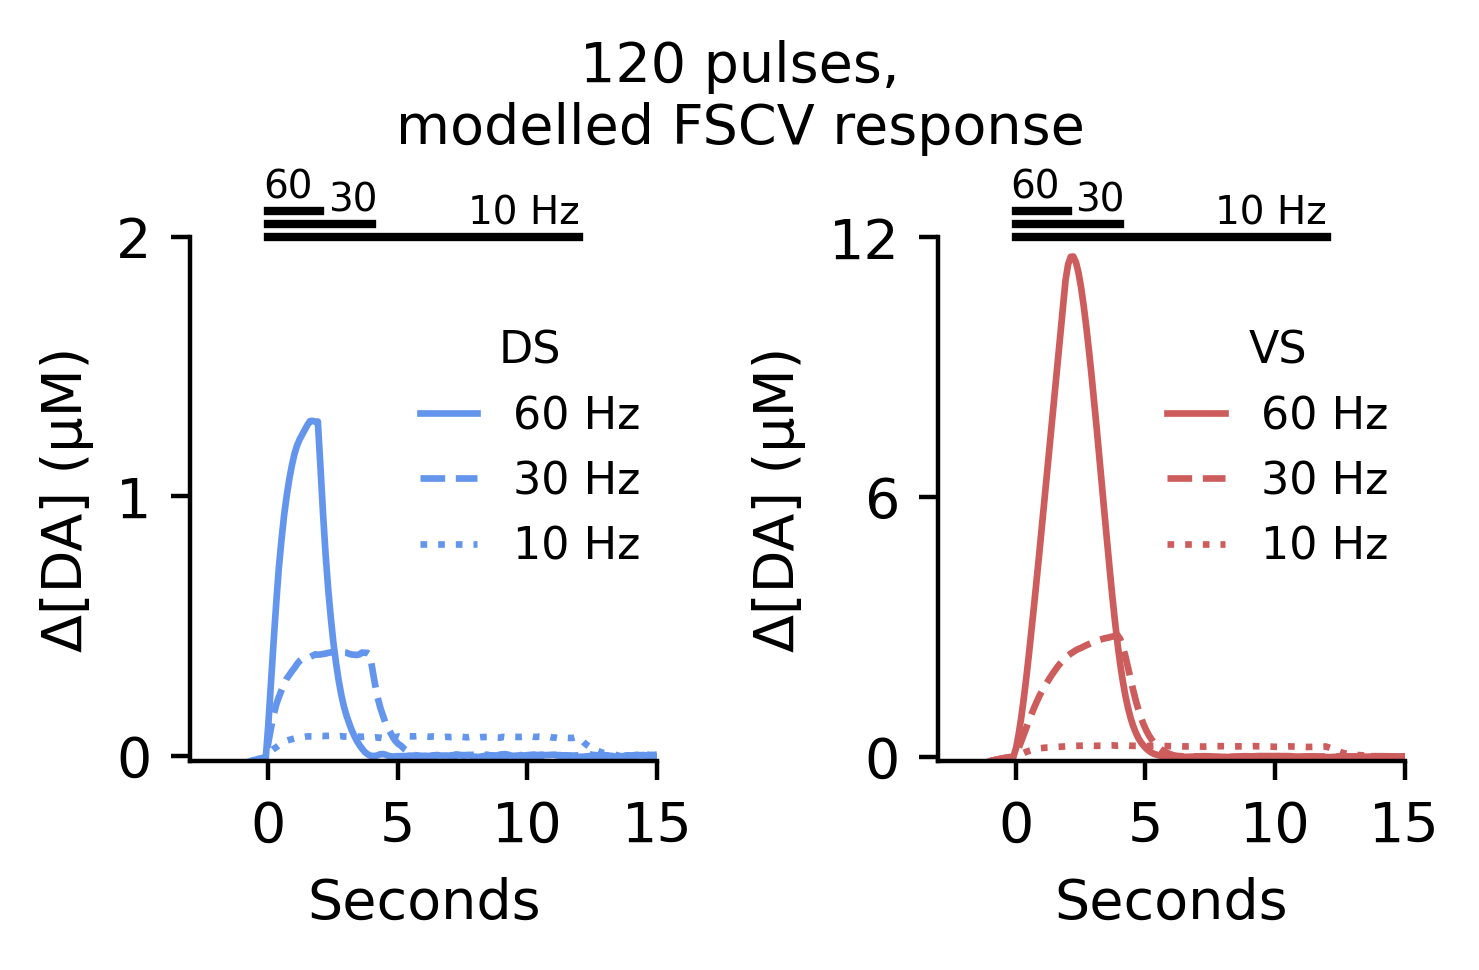

In [35]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (3.8,2.7), dpi = 200, gridspec_kw={"height_ratios": [1]})
fig.suptitle("120 pulses,\nmodelled FSCV response", fontsize = 10, y = 0.88)

# DS
mean_DS_fscv = np.mean(pseudo_FSCV[0,0,100:150]) # Mean used to subtract baseline
ax1.plot(np.linspace(0,20,200)-1,pseudo_FSCV[0,0,:-19]-mean_DS_fscv, color = "cornflowerblue", ls = "-", lw = 1.2)
ax1.plot(np.linspace(0,20,200)-1,pseudo_FSCV[0,1,:-19]-mean_DS_fscv, color = "cornflowerblue", ls = "--", lw = 1.2)
ax1.plot(np.linspace(0,20,200)-1,pseudo_FSCV[0,2,:-19]-mean_DS_fscv, color = "cornflowerblue", ls = ":", lw = 1.2)

ax1.plot([0,2], [2100, 2100], clip_on = False, color = "k")
ax1.text(-0.2,2150, "60", fontsize = 7, ha = "left")
ax1.plot([0,4], [2050, 2050], clip_on = False, color = "k")
ax1.text(4.2,2100, "30", fontsize = 7, ha = "right")
ax1.plot([0,12], [2000, 2000], clip_on = False, color = "k")
ax1.text(12,2050, "10 Hz", fontsize = 7, ha = "right")

ax1.legend(("60 Hz", "30 Hz", "10 Hz"), title="DS", title_fontsize = 8,
           ncol = 1, handlelength = 1.3, columnspacing = 1, frameon = False,
            bbox_to_anchor = [1.05,.9], loc = "upper right", fontsize = 8)

ax1.set_xlim(-3,15)
ax1.set_xticks([0,5,10,15])
ax1.set_ylim(-20,2000)
ax1.set_yticks([0,1000,2000])
ax1.set_yticklabels([0,1,2])
ax1.set_xlabel("Seconds")
ax1.set_ylabel("\u0394[DA] (\u00B5M)")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

# VS
mean_VS_fscv = np.mean(pseudo_FSCV[1,0,100:150]) # Mean used to subtract baseline
ax2.plot(np.linspace(0,20,200)-1,pseudo_FSCV[1,0,:-19]-mean_VS_fscv, color = "indianred", ls = "-", lw = 1.2)
ax2.plot(np.linspace(0,20,200)-1,pseudo_FSCV[1,1,:-19]-mean_VS_fscv, color = "indianred", ls = "--", lw = 1.2)
ax2.plot(np.linspace(0,20,200)-1,pseudo_FSCV[1,2,:-19]-mean_VS_fscv, color = "indianred", ls = ":", lw = 1.2)

ax2.plot([0,2], [12600, 12600], clip_on = False, color = "k")
ax2.text(-0.2,12900, "60", fontsize = 7, ha = "left")
ax2.plot([0,4], [12300, 12300], clip_on = False, color = "k")
ax2.text(4.2,12600, "30", fontsize = 7, ha = "right")
ax2.plot([0,12], [12000, 12000], clip_on = False, color = "k")
ax2.text(12,12300, "10 Hz", fontsize = 7, ha = "right")

ax2.legend(("60 Hz", "30 Hz", "10 Hz"), title="VS", title_fontsize = 8,
           ncol = 1, handlelength = 1.3, columnspacing = 1, frameon = False,
            bbox_to_anchor = [1.05,.9], loc = "upper right", fontsize = 8)

ax2.set_xlim(-3,15)
ax2.set_xticks([0,5,10,15])
ax2.set_ylim(-100,12000)
ax2.set_yticks([0,6000,12000])
ax2.set_yticklabels([0,6,12])
ax2.set_xlabel("Seconds")
ax2.set_ylabel("\u0394[DA] (\u00B5M)")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)



fig.tight_layout()

### Figure 2G, receptor occupany after single burst

#### Simulate the burst

In [2]:
## DS
# Simulate release sites and firing pattern
simulation, space_ph, firing, release_sites, var_list = \
        sim.sim_space_neurons_3D(width = 50, depth = 50, dx_dy = 1, time = 17, D = 763,
                  inter_var_distance = 25, p_r = 0.06, f_rate = 4, n_neurons = 150, Hz = 0.002)

# Define the area
width = 50
r_sphere = 5
      
# Define the burst
start_time = 7 # In seconds
start_time_dt = int(start_time/var_list[1]) # convert to index

n_ap = 6 # Number of action potentials in a burst
burst_rate = 20 # Burst firing rate (Hz)
burst_p_r = 1 # Release probability per AP during bursts

burst_time = int(1/var_list[1]*(n_ap/burst_rate)) # Length of the burst
AP_freq = n_ap/burst_time # APs per d_t

# Find relevant terminals
ROI = (release_sites[0,:] > (width/2 - r_sphere - 0.5)) & (release_sites[0,:] < (width/2 + r_sphere - 0.5)) & \
      (release_sites[1,:] > (width/2 - r_sphere - 0.5)) & (release_sites[1,:] < (width/2 + r_sphere - 0.5))
      
# Add the burst of firing
firing[start_time_dt:start_time_dt+burst_time,ROI] =\
    np.random.poisson(AP_freq * burst_p_r, (burst_time, np.sum(ROI)))

# Simulate the dynamics
full_sim_DS_burst, occ_D1_DS_burst, occ_D2_DS_burst = sim.sim_dynamics_3D(simulation, space_ph, release_sites, firing, var_list, 
                  Q = 3000, uptake_rate = 6*10**-6, Ds = 321.7237308146399, start_occ_D2 = 0.4)

# Find a site for DS
site_no = 2
x_site = release_sites[0,np.where(ROI==True)[0][site_no]]
y_site = release_sites[1,np.where(ROI==True)[0][site_no]]
z_site = release_sites[2,np.where(ROI==True)[0][site_no]]

## VS
# Simulate release sites and firing pattern
simulation, space_ph, firing, release_sites_VS, var_list = \
        sim.sim_space_neurons_3D(width = 50, depth = 50, dx_dy = 1, time = 17, D = 763,
                  inter_var_distance = 25/0.9, p_r = 0.06, f_rate = 4, n_neurons = 150, Hz = 0.002)

# Find relevant terminals
ROI = (release_sites_VS[0,:] > (width/2 - r_sphere - 0.5)) & (release_sites_VS[0,:] < (width/2 + r_sphere - 0.5)) & \
      (release_sites_VS[1,:] > (width/2 - r_sphere - 0.5)) & (release_sites_VS[1,:] < (width/2 + r_sphere - 0.5))
      
# Add the burst of firing
firing[start_time_dt:start_time_dt+burst_time,ROI] =\
    np.random.poisson(AP_freq * burst_p_r, (burst_time, np.sum(ROI)))

# Simulate the dynamics
full_sim_VS_burst, occ_D1_VS_burst, occ_D2_VS_burst = sim.sim_dynamics_3D(simulation, space_ph, release_sites_VS, firing, var_list, 
                  Q = 3000, uptake_rate = 2*10**-6, Ds = 321.7237308146399, start_occ_D2 = 0.4)

# Find a site for VS
site_no = 2
x_site_VS = release_sites_VS[0,np.where(ROI==True)[0][site_no]]
y_site_VS = release_sites_VS[1,np.where(ROI==True)[0][site_no]]
z_site_VS = release_sites_VS[2,np.where(ROI==True)[0][site_no]]


100%|████████████████████████████████████| 51883/51883 [01:43<00:00, 503.35it/s]


#### Plot the occupancy for VS

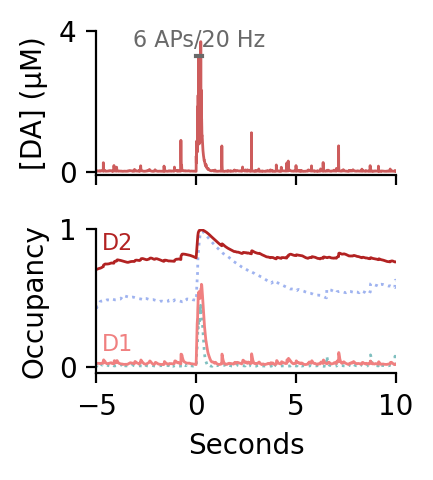

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (2.4,2.5), dpi = 200)
time_y = np.linspace(-5, 10, 7500)

# Concentration profile
# ax1.set_title("Receptor binding", fontsize = 10)
ax1.plot(time_y, full_sim_VS_burst[1000:,x_site_VS,y_site_VS,z_site_VS+1]*10**6, lw = 1, color = "indianred")

# The burst
ax1.plot([0,0.3],[3.3,3.3], color = "dimgrey")
ax1.text(0.15, 3.55, "6 APs/20 Hz", ha = "center", fontsize = 8, color = "dimgrey")

ax1.set_ylim(-0.1,2)
ax1.set_yticks([0,4])
ax1.set_xlim(-5,10)
ax1.set_xticklabels([])
ax1.set_ylabel("[DA] (\u00B5M)")

## Receptor occupany
# VS
ax2.plot(time_y, occ_D1_VS_burst[1000:,x_site_VS,y_site_VS,z_site_VS+1], lw = 1, color = "lightcoral", ls = "-")
ax2.text(-4.7,0.115, "D1", ha = "left", fontsize = 8, color = "lightcoral")

ax2.plot(time_y, occ_D2_VS_burst[1000:,x_site_VS,y_site_VS,z_site_VS+1], lw = 1, color = "firebrick", ls = "-")
ax2.text(-4.7,0.85, "D2", ha = "left", fontsize = 8, color = "firebrick")

# DS
ax2.plot(time_y, occ_D1_DS_burst[1000:,x_site,y_site,z_site+1], 
         lw = 1, color = "teal", ls = ":", zorder = 0, alpha = 0.5)

ax2.plot(time_y, occ_D2_DS_burst[1000:,x_site,y_site,z_site+1], 
         lw = 1, color = "royalblue", ls = ":", zorder = 0, alpha = 0.5)

ax2.set_ylim(-0.05,1)
ax2.set_xlim(-5,10)
ax2.set_ylabel("Occupancy")
ax2.set_xlabel("Seconds")

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

fig.tight_layout()